# Linear time-invariant system

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.signal as sig

%matplotlib inline

In [2]:
def plot(x, y):
    plt.plot(x,y)
    plt.grid()
    plt.axhline(0, c='black')
    plt.axvline(0, c='black')

## Transfer function representation

$$ A_n(\frac{d}{dt})x = B_m(\frac{d}{dt})y $$

$$ \mathcal{L}[f(t)] = \int\limits_0^{\infty} f(t) e^{-st} dt $$

$$ \mathcal{L}[A_n(\frac{d}{dt})x] = \mathcal{L}[B_m(\frac{d}{dt})y] $$

$$ A_n(s)X = B_m(s)Y $$

$$ H(s) = \frac{A_n(s)}{B_m(s)} \Rightarrow Y = HX $$

In [3]:
numerator = np.array([1,-1,1,-1])
denominator = np.array([1,0,1,4])

In [4]:
print(f"Physically implementable:  {numerator.shape[0] < denominator.shape[0]}")

Physically implementable:  False


## ZPK representation

$$ A_n(z_i) = 0 \;\;\; B_m(p_i) = 0 $$

$$ H(s) = k \frac{\prod\limits_{i=1}^{n}(s-z_i)}{\prod\limits_{j=1}^{m}(s-p_j)} $$

In [5]:
z,p,k = sig.tf2zpk(numerator, denominator)

In [6]:
print(f"Zeros: {z}")
print(f"Poles: {p}")
print(f"Koeff: {k}")

print(f"System stability: {~np.any(p.real >= 0)}")

Zeros: [1.00000000e+00+0.j 7.77156117e-16+1.j 7.77156117e-16-1.j]
Poles: [ 0.68939835+1.55750129j  0.68939835-1.55750129j -1.3787967 +0.j        ]
Koeff: 1.0
System stability: False


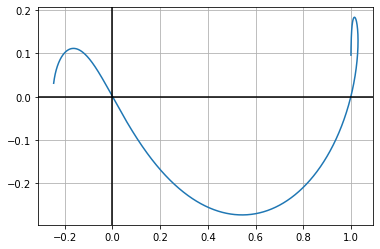

In [7]:
w, nyquist = sig.freqresp((z, p, k))

plot(nyquist.real, nyquist.imag)

## Space-state representation

$q$ - state variables

$$
\begin{cases}
    \dfrac{dq}{dt} &= \textbf{A}q + \textbf{B}x \\
    y &= \textbf{C}q + \textbf{D}x
\end{cases}
$$

In [8]:
A,B,C,D = sig.zpk2ss(z, p, k)

In [9]:
def observable(A,B,C,D):    
    T = np.empty_like(A) #Tinv
    for i in range(A.shape[0]):
        T[i, :] = (np.linalg.matrix_power(A, i).T @ C.T).reshape(A.shape[0])    
    
    An = T @ A @ np.linalg.inv(T)
    Bn = T @ B
    Cn = C @ np.linalg.inv(T)    
    return An, Bn, Cn, D

def controlable(A,B, C, D):
    T = np.empty_like(A)
    for i in range(A.shape[0]):
        T[:, i] = (np.linalg.matrix_power(A, i) @ B).reshape(A.shape[0])    
        
    An = np.linalg.inv(T) @ A @ T
    Bn = np.linalg.inv(T) @ B
    Cn = C @ T
    return An, Bn, Cn, D

In [10]:
print("Observable canonical form")
print(np.round(observable(A, B, C, D)[0], 3))

Observable canonical form
[[ 0.  1. -0.]
 [ 0. -0.  1.]
 [-4. -1.  0.]]


In [11]:
print("Controlable canonical form")
np.round(controlable(A, B, C, D)[0], 3)

Controlable canonical form


array([[ 0.,  0., -4.],
       [ 1.,  0., -1.],
       [ 0.,  1.,  0.]])

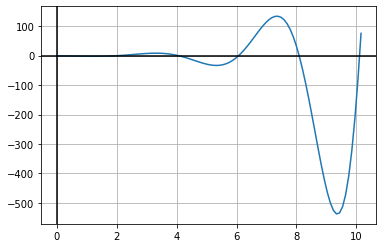

In [12]:
t,y = sig.impulse((A, B, C, D))

plot(t, y)

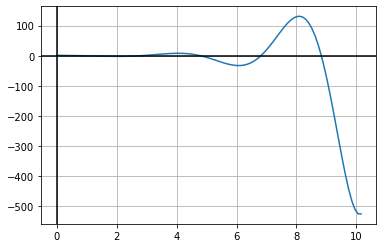

In [13]:
t, y = sig.step((A, B, C, D))

plot(t,y)